# Introduction

Our report utilizes data from the Vancouver Police Department to study crime report trends across different neighborhoods in Vancouver [2]. This study has the potential to assist the police in identifying areas with a higher probability of crime activities, thereby enabling them to strategically distribute and allocate their human resources to maximize effectiveness. To achieve this, we selected all years of crime data avaliable to improve the accuracy of our estimations. Maximizing the use of human resources is crucial in possibly minimizing the crime level.

The rationale behind selecting data from all years is to leverage historical data to estimate the proportions effectively. By considering multiple years of data, we gain a broader perspective on crime patterns, enabling us to identify long-term trends and potential seasonality [3]. This approach leads to more accurate estimations as compared to relying solely on data from a single year, which might be influenced by external factors such as the pandemic.

To substantiate our observations, we have devised a hypothesis test to compare the proportion of "theft from vehicle" in all crime reports between two locations, Mount Pleasant and Strathcona, relying on their respective sample proportions and another hypothesis test comparing the proportion of "crimes against a person" between Mount Pleasant and Strathcona.

The reason behind conducting this hypothesis test is to examine whether the proportion of "theft from vehicle" in Mount Pleasant differs from that in Strathcona. Given the similarity in crime report rates between the two areas, we aim to investigate whether "theft from vehicle" is the primary reason for the high crime rate in Mount Pleasant. To achieve this, we have formulated the null hypothesis, assuming that the difference in the proportion of theft from vehicle between Mount Pleasant and Strathcona is zero. On the other hand, the alternative hypothesis posits that the proportion of theft from vehicle in Mount Pleasant is indeed greater than that in Strathcona.

Similarly, the hypothesis test for "crime against person" aims to explore whether this specific type of crime is a significant contributing factor to the higher crime rate observed in Strathcona, as compared to Mount Pleasant. The null hypothesis posits that the proportion of "crime against person" in Strathcona is equal to that in Mount Pleasant. On the other hand, the alternative hypothesis suggests that the proportion of "crime against person" in Strathcona is greater than that in Mount Pleasant.

![image](https://gifdb.com/images/high/guilty-cop-looking-for-a-committed-crime-a77ia3islo986774.webp)

The dataset contains multiple variables however we will only use the columns TYPE, YEAR and NEIGHBOURHOOD. 

The column TYPE contains different categories of crimes repoted such as Theft from Vehicle,Homicide,Mischief,Offence Against a Person. 

The column YEAR contains the data from all the years from 2003 to 2022. 

The column NEIGHBOURHOOD contain different areas of vanouver for which the data is recorded such as West End, Strathcona, Mount Pleasant,Fairview. 
           
           
Based on our hypothesis testing, the variables we are mainly focusing on would be "Theft from vehicle" and "Crimes against person" in column "TYPE", all years in cloumn "YEAR", and "Mount Pleasant" and "Strathcona" in column "NEIGHBOURHOOD".

#### Based on this, we want to know: 

* Is the crime type of "Theft from a vehicle" greater in Mount Pleasant than Strathacona?

H<sub>0</sub>: Theft From Vehicle in Mount Pleasant = Strathacona

H<sub>1</sub>: Theft From Vehicle in Mount Pleasant > Strathacona

* Is the crime type of "Crimes against a person" greater in Strathacona than Mount Pleasant ?

H<sub>0</sub>: Offence against a person in Mount Pleasant = Strathacona

H<sub>1</sub>: Offence against a person in Mount Pleasant > Strathacona



# Method

### Importing Libraries

In [1]:
# Importing some necessary libraries

library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Reading the Data

Reading crime dataset from github link and performing some cleaning to make the data more readable by using mutate(), as_factor() and drop_na() functions.

In [61]:
crime_data <- read_csv("https://raw.githubusercontent.com/vkyaang/Stat201-project/main/crimedata_csv_AllNeighbourhoods_AllYears.csv") %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 868146 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


*Table 1: The crime dataset*

### Data Summary 

Calculating the relevant summaries and finding the point estimates

In [3]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%  
                    select(TYPE, NEIGHBOURHOOD) %>%
                    group_by(TYPE)

crime_data_total <- crime_data_clean %>%
    summarise(total = n())
    

# Separating the two neighbourhood to get a data summary
# Dataframe for Mount Pleasant
mount_pleasant_n <- crime_data_clean %>%  
    filter(NEIGHBOURHOOD == 'Mount Pleasant') %>%
    summarise(MountPleasent = n())

# Dataframe for Strathcona
strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    summarise(Strathcona = n())

# Combining the datasets and finding proportion and other relevant data, presenrted in a form of a table
crime_data_sum <- crime_data_total %>%
    inner_join(mount_pleasant_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(MountPleasent_prop = MountPleasent/sum(total)) %>%
    mutate(strathcona_prop = Strathcona/sum(total)) %>%
    mutate(prop_diff = MountPleasent_prop - strathcona_prop)

In [4]:
head(crime_data_clean)

TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


*Table2 : Clean data with only relevant data*

In [5]:
head(crime_data_total)

TYPE,total
<fct>,<int>
Theft from Vehicle,240856
Theft of Bicycle,36930
Theft of Vehicle,44710
Vehicle Collision or Pedestrian Struck (with Fatality),347
Vehicle Collision or Pedestrian Struck (with Injury),28839
Break and Enter Commercial,47310


*Table 3: Sum total of all crimes*

In [6]:
crime_data_sum

TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,1.537457e-02,1.516258e-02,0.0002119835
Theft of Bicycle,36930,3955,1692,4.556494e-03,1.949327e-03,0.0026071669
Theft of Vehicle,44710,3118,2250,3.592199e-03,2.592190e-03,0.0010000092
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,2.419377e-05,3.917087e-05,-0.0000149771
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,2.447027e-03,1.796100e-03,0.0006509277
Break and Enter Commercial,47310,4122,3146,4.748892e-03,3.624457e-03,0.0011244343
Break and Enter Residential/Other,72174,3872,2681,4.460871e-03,3.088738e-03,0.0013721325
Homicide,309,19,32,2.188960e-05,3.686670e-05,-0.0000149771
Mischief,105195,6102,8142,7.030019e-03,9.380271e-03,-0.0023502521


*Table 4: Proportions of different crimes*

In [7]:
summary(crime_data_clean)

                                TYPE                          NEIGHBOURHOOD   
 Theft from Vehicle               :240856   Central Business District:233260  
 Other Theft                      :215709   West End                 : 78052  
 Mischief                         :105195   Strathcona               : 55744  
 Offence Against a Person         : 75613   Mount Pleasant           : 54681  
 Break and Enter Residential/Other: 72174   Fairview                 : 53340  
 Break and Enter Commercial       : 47310   Grandview-Woodland       : 48805  
 (Other)                          :111135   (Other)                  :344110  

*Table 5: Dataset Summary*

In [8]:
# Getting the number of different crime type rate in the two neighbourhoods

dataMP <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Mount Pleasant") |>
            group_by(TYPE) |>
            summarize(n= n())

dataS <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Strathcona") |>
            group_by(TYPE) |>
            summarize(n= n())

In [9]:
dataMP

TYPE,n
<fct>,<int>
Theft from Vehicle,13345
Theft of Bicycle,3955
Theft of Vehicle,3118
Vehicle Collision or Pedestrian Struck (with Fatality),21
Vehicle Collision or Pedestrian Struck (with Injury),2124
Break and Enter Commercial,4122
Break and Enter Residential/Other,3872
Homicide,19
Mischief,6102


*Table 6: Number of crimes reported in Mount Pleasant*

In [10]:
dataS

TYPE,n
<fct>,<int>
Theft from Vehicle,13161
Theft of Bicycle,1692
Theft of Vehicle,2250
Vehicle Collision or Pedestrian Struck (with Fatality),34
Vehicle Collision or Pedestrian Struck (with Injury),1559
Break and Enter Commercial,3146
Break and Enter Residential/Other,2681
Homicide,32
Mischief,8142


*Table 7: Number of crimes reported in Strathacona*

In [11]:
# Calculating the total crime reported
neighbor_total <- crime_data %>%
    select(NEIGHBOURHOOD) %>%
    summarise(n = n()) %>%
    pull()

# Finding the crime rate proportion in Mount Pleasant using the total crime rate and Mount Pleasant crime rate
dataMP_prop <- dataMP |>
     summarize(total_number_of_crime= sum(n)) |>
     mutate(location = 'Mount Pleasant') |>
     mutate(prop = total_number_of_crime/neighbor_total) 


# Finding the crime rate proportion in Strathcona using the total crime rate and Mount Pleasant crime rate
dataS_prop <- dataS |>
      summarize(total_number_of_crime= sum(n))  |>
      mutate(location = 'Strathcona') |>
      mutate(prop = total_number_of_crime/neighbor_total)

In [12]:
# Combining the two crime rates to get a summary of the proportions
proportion <- rbind(dataS_prop, dataMP_prop) 

In [13]:
proportion

total_number_of_crime,location,prop
<int>,<chr>,<dbl>
55744,Strathcona,0.06422179
54681,Mount Pleasant,0.06299712


*Table 8: Crimes rates of two neighboorhoods*

### Visualization 

Plotting all the summarized data and comparing the crime rates 

*Table 8: Crimes rates of two neighboorhoods*

In [14]:
# Plotting the crime rates to visualize the proportion difference between Mount Pleasant and Strathcona
options(repr.plot.width = 6, repr.plot.height = 5)
prop_plot <- proportion %>%
    ggplot(aes(x=location, y=prop)) +
    geom_bar(stat = 'identity') +
    labs(y='Neighborhood', x='Proportion') +
    ggtitle('Proportion of All Crimes for Mount Pleasant and Strathcona ') +
    theme(axis.text.x = element_text(size=15))

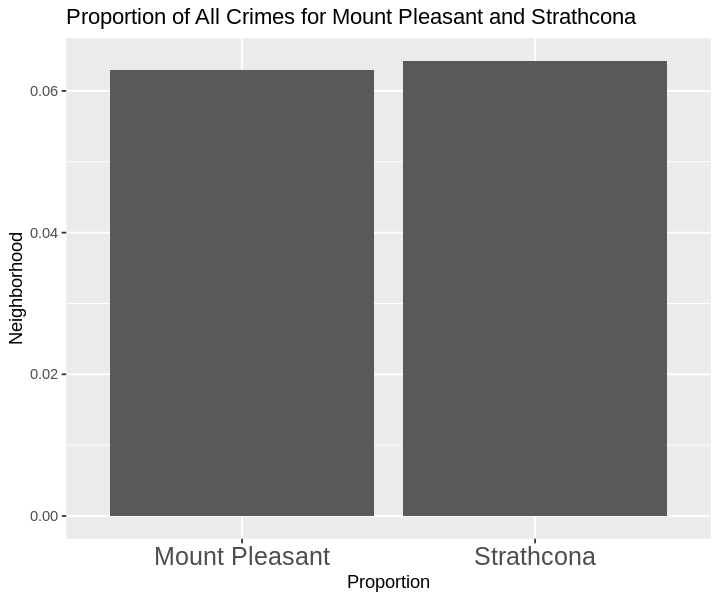

In [15]:
prop_plot

*Plot 1: Crime rates plot*

In [16]:
# Plotting Proportions of different types of crimes in Mount Pleasant
options(repr.plot.width = 12, repr.plot.height = 10)
mountpleasant_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y= MountPleasent_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Mount Pleasant)', x='Type of Crimes') +
    ggtitle('Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))

# Plotting Proportions of different types of crimes in Strathacona
options(repr.plot.width = 15, repr.plot.height = 10)
strathcona_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=strathcona_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Strathcona)', x='Type of Crimes') +
    ggtitle('Strathconat Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))

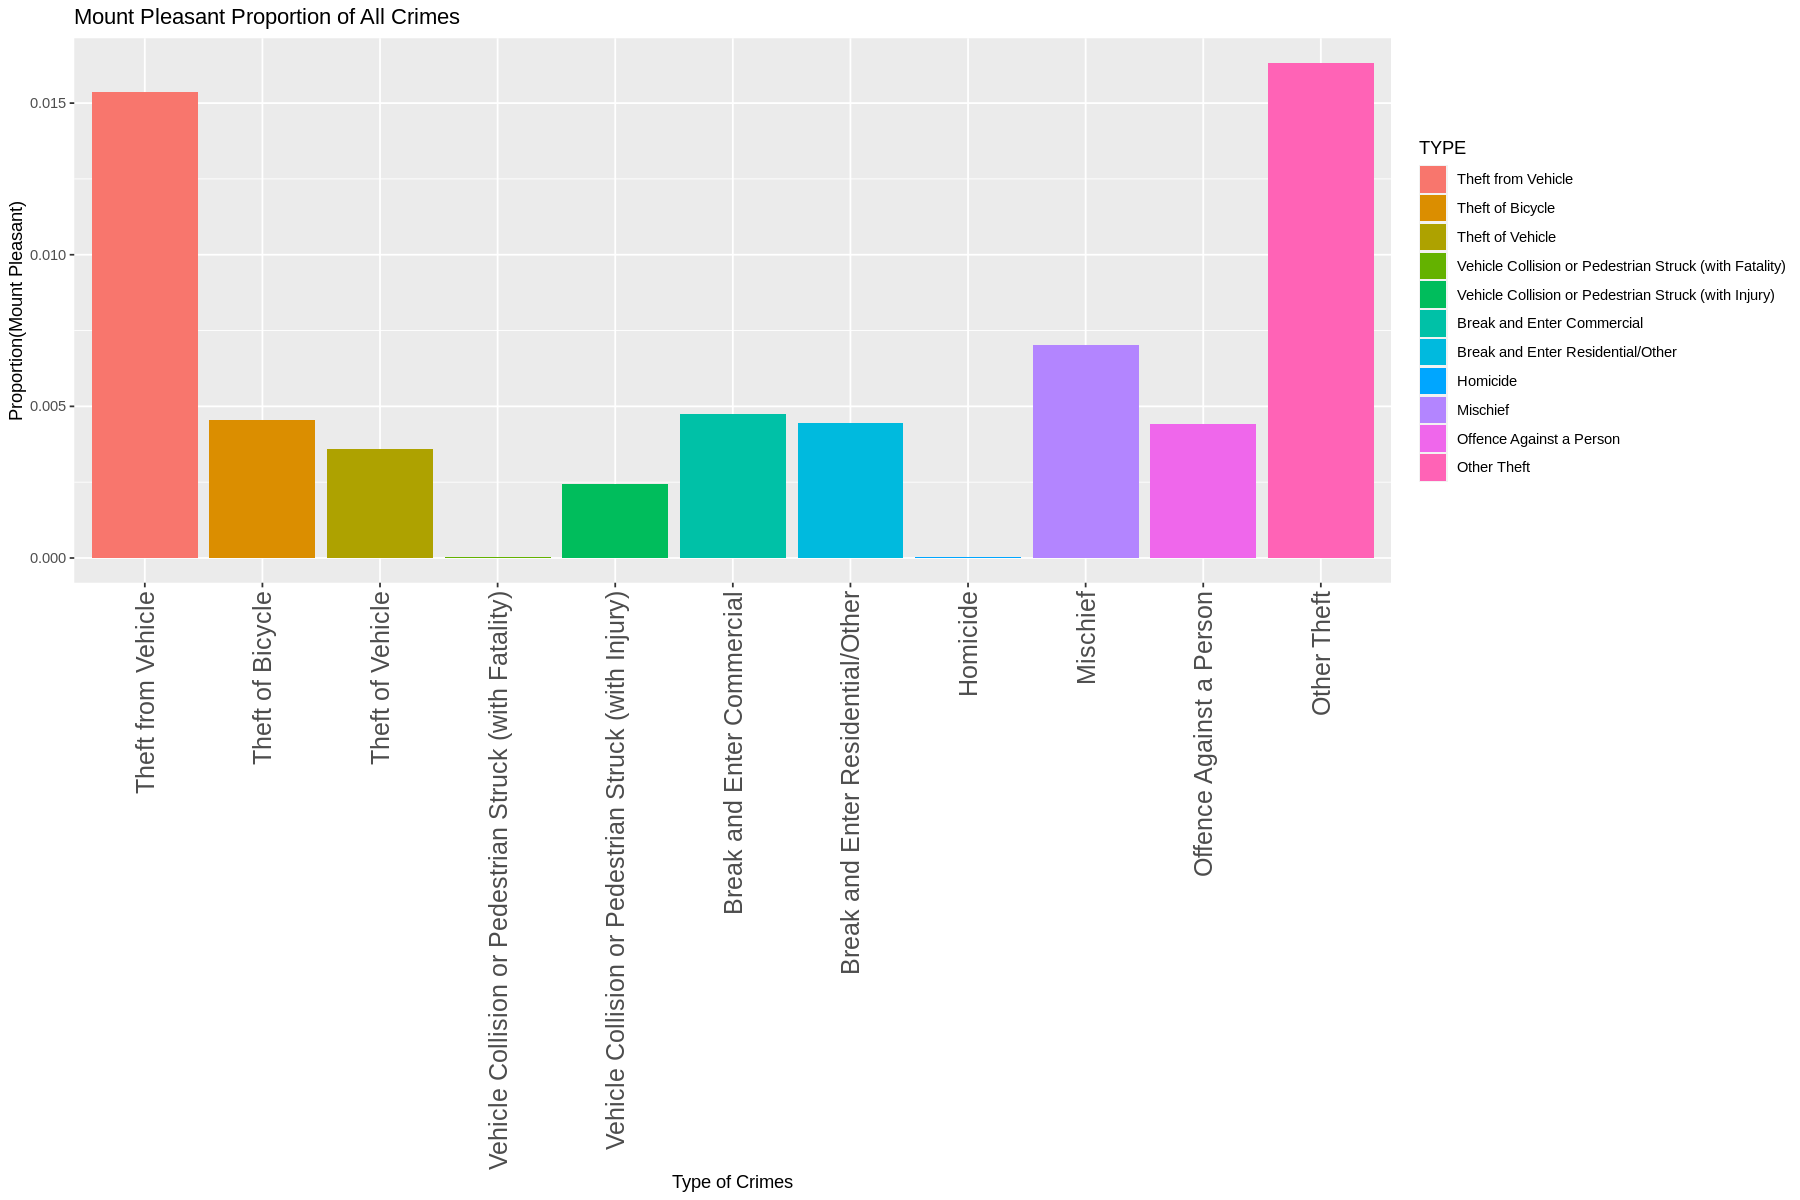

In [17]:
mountpleasant_sum_plot

*Plot 2: Different Type of crimes in Mount Pleasant*

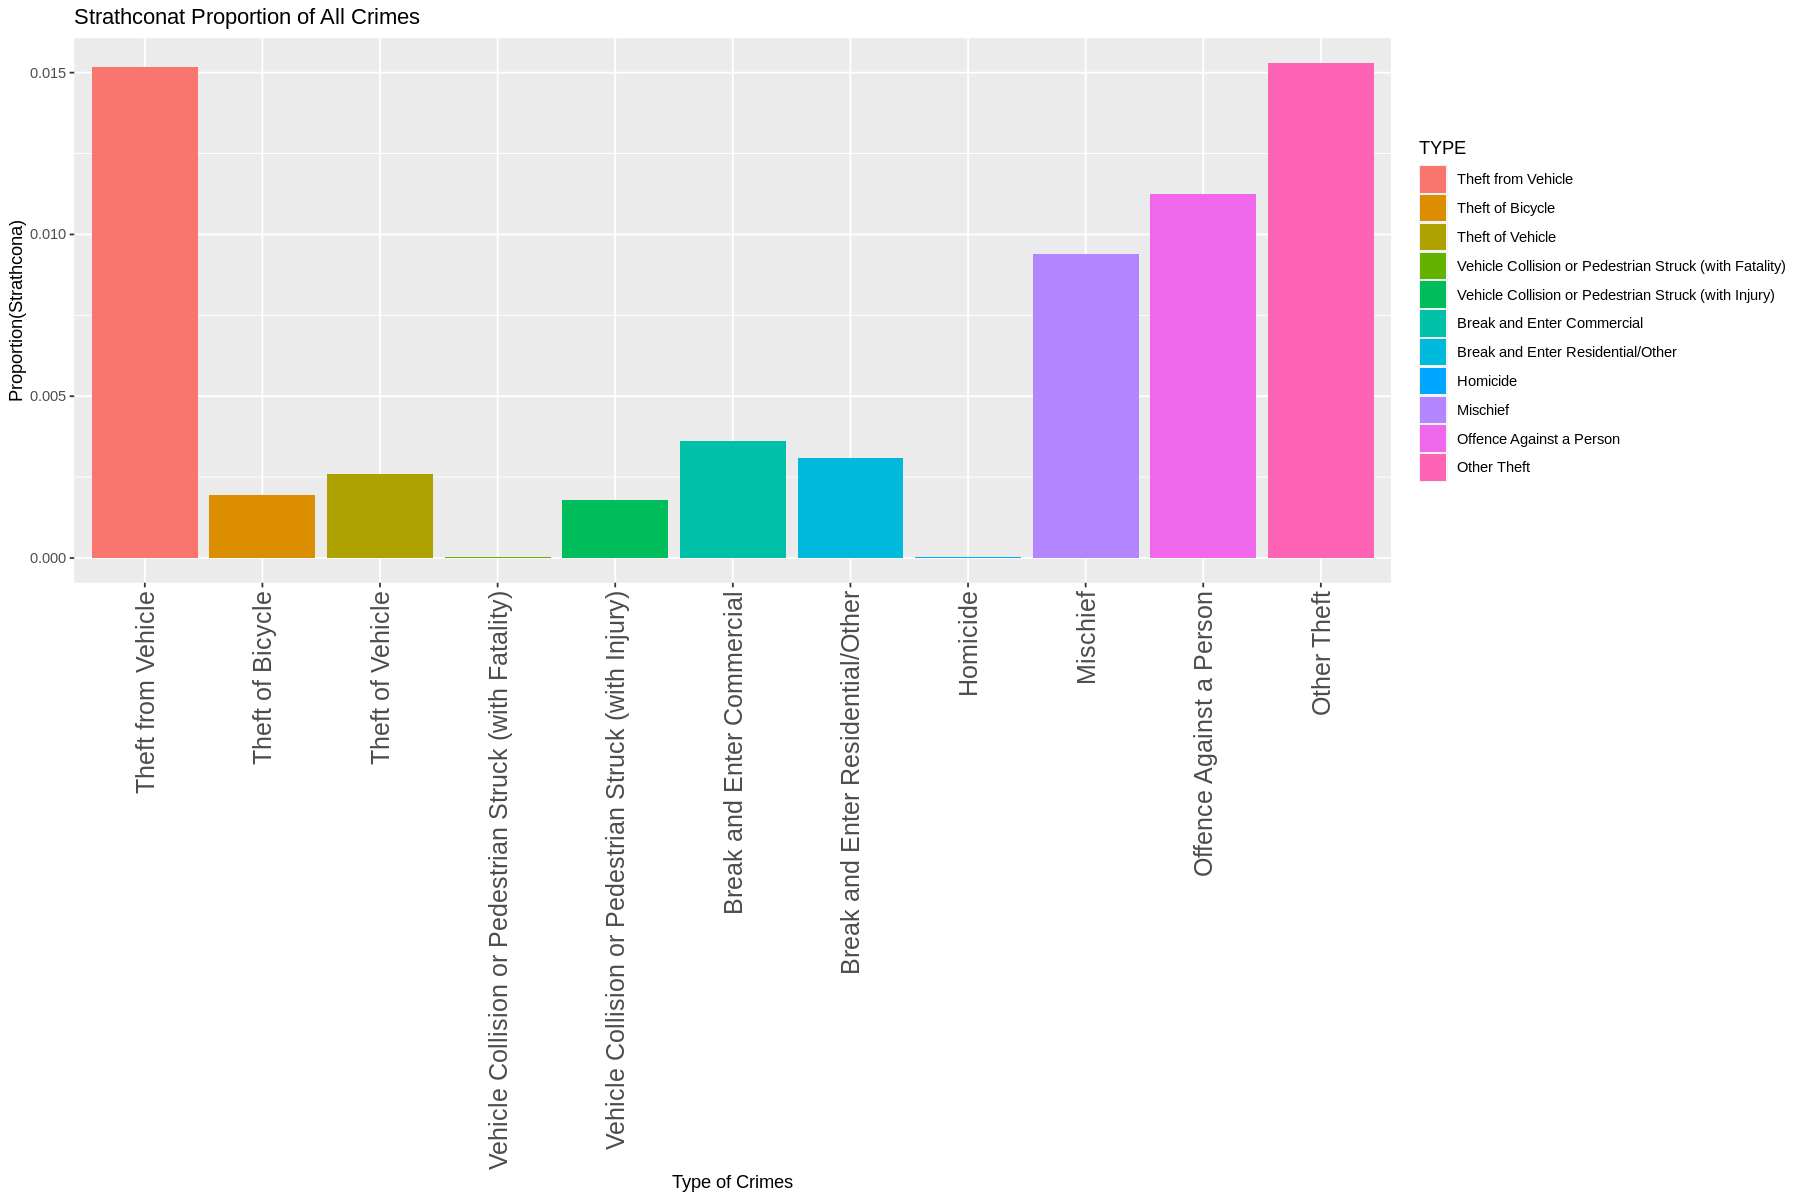

In [18]:
strathcona_sum_plot

*Plot 3: Different Type of crimes in Strathacona*

In [67]:
# Plotting the graphs together to better compare the different crime rates
options(repr.plot.width = 13, repr.plot.height = 8)

mp_prop <- crime_data_sum %>%
    select(MountPleasent_prop, TYPE) %>%
    mutate(neighborhood = 'Mount Pleasant', 
          prop = MountPleasent_prop) %>%
    select(-MountPleasent_prop)

s_prop <- crime_data_sum %>%
    select(strathcona_prop, TYPE) %>%
    mutate(neighborhood = 'Strathconat', 
          prop = strathcona_prop)  %>%
    select(-strathcona_prop)

    
all_prop <- rbind(mp_prop, s_prop)

combined_prop_plot <- all_prop %>%
    ggplot(aes(x=TYPE, y=prop, fill = neighborhood)) +
    geom_bar(stat = 'identity', position = "dodge") +
    labs(y='Proportion', x='Type of Crimes', legend= 'Neighborhood') +
    ggtitle('Strathconat and Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15)) +
    coord_flip()

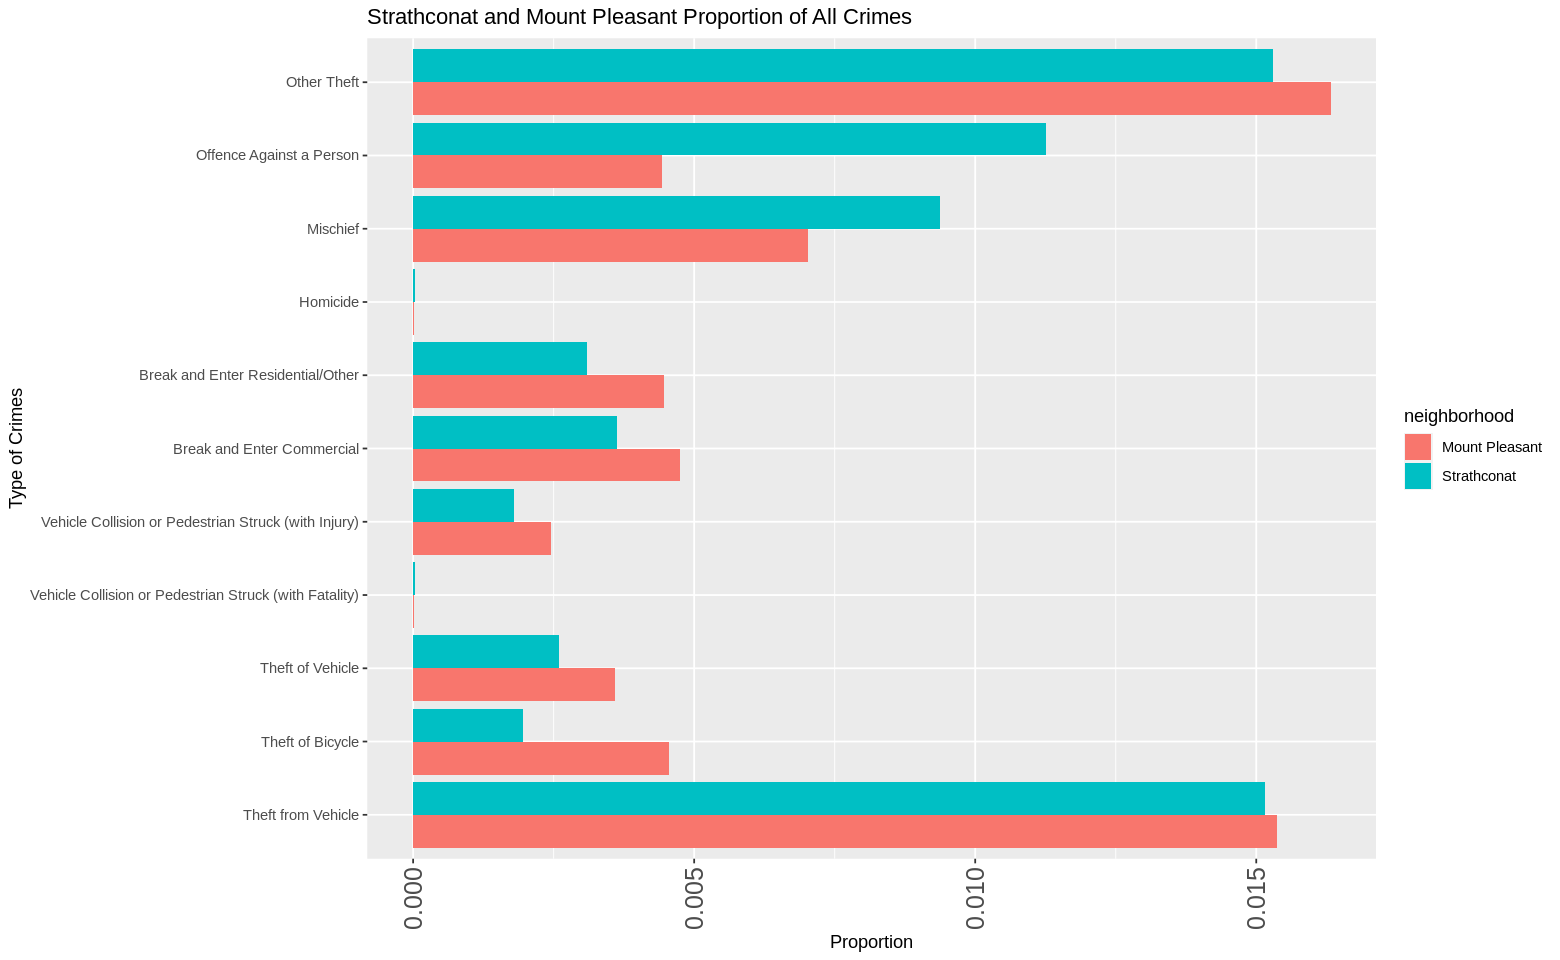

In [65]:
combined_prop_plot

*Plot 4: Comparing the crime rates*

### Statistical Model

Analyzing the data using multiple tests as described below

In [79]:
# To better work with our desired data, we are filtering only two neighbourhoods and two crime types

# NEIGHBOURHOOD 1: Strathcona
# NEIGHBOURHOOD 2: Mount Pleasant

# CRIME TYPE 1: Theft from Vehicle
# CRIME TYPE 2: Offence Against a Person


crime_new <- crime_data %>% 
    select(TYPE, NEIGHBOURHOOD) #Selecting relevant columns

n <- nrow(crime_new)

crime_mp_s <- crime_new %>%
    filter(TYPE == "Theft from Vehicle" | TYPE == "Offence Against a Person") %>% #Filtering the crime type
    filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>% #Filtering the neighbourhood
    group_by(TYPE)

crime_theft <- crime_new %>%  #printing only theft from vehicle crime type
    filter(NEIGHBOURHOOD %in% c("Strathcona	", "Mount Pleasant")) %>%
    mutate(is_theft = TYPE == "Theft from Vehicle")



In [81]:
tail(crime_mp_s)

TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


*Table 9: Crime theft data filtered*

In [83]:
tail(crime_theft)

TYPE,NEIGHBOURHOOD,is_theft
<fct>,<fct>,<lgl>
Theft from Vehicle,Mount Pleasant,TRUE
Theft from Vehicle,Mount Pleasant,TRUE
Theft from Vehicle,Mount Pleasant,TRUE
Theft from Vehicle,Mount Pleasant,TRUE
Theft from Vehicle,Mount Pleasant,TRUE
Theft from Vehicle,Mount Pleasant,TRUE


*Table 10: Theft from vehicle type for the two neighbourhoods*

In [84]:
# Number of rows in the above data
n

[1] 867992

In [90]:
# Printing the number of crimes commited in each neighbourhood for theft from a vehicle type

crime_is_theft_sum <- crime_data %>%  
        select(TYPE, NEIGHBOURHOOD) %>%
        filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>%
        mutate(is_theft = TYPE == "Theft from Vehicle") %>%
        group_by(NEIGHBOURHOOD) %>%
        count(is_theft) %>%
        mutate(prop = n/sum(n))

crime_is_theft_sum

NEIGHBOURHOOD,is_theft,n,prop
<fct>,<lgl>,<int>,<dbl>
Strathcona,FALSE,42583,0.7639028
Strathcona,TRUE,13161,0.2360972
Mount Pleasant,FALSE,41336,0.7559481
Mount Pleasant,TRUE,13345,0.2440519


*Table 11: Number of rows with crime commited (Theft from Vehicle)*

In [95]:
# Printing the number of crimes commited in each neighbourhood for offence against a person type

crime_is_o_sum <- crime_data %>%  
        select(TYPE, NEIGHBOURHOOD) %>%
        filter(NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD =="Mount Pleasant") %>%
        mutate(is_offence = TYPE == "Offence Against a Person") %>%
        group_by(NEIGHBOURHOOD) %>%
        count(is_offence) %>%
        mutate(prop = n/sum(n))

crime_is_o_sum

NEIGHBOURHOOD,is_offence,n,prop
<fct>,<lgl>,<int>,<dbl>
Strathcona,FALSE,45975,0.82475244
Strathcona,TRUE,9769,0.17524756
Mount Pleasant,FALSE,50845,0.92984766
Mount Pleasant,TRUE,3836,0.07015234


*Table 12: Number of rows with crime commited (Offence Against a Person)*

In [97]:
# grouping the sample by locations 
set.seed(1)
mount_pleasant <- crime_data %>%  
    select(TYPE, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD == 'Mount Pleasant')

strathcona <- crime_data %>%  
    select(TYPE, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD == 'Strathcona')

mount_pleasant_sample <- mount_pleasant %>%
    rep_sample_n(size = nrow(mount_pleasant), reps = 50, replace = TRUE) %>%
    group_by(replicate)

strathcona_sample <- strathcona %>%
    rep_sample_n(size = nrow(strathcona), reps = 50, replace = TRUE) %>%
    group_by(replicate)

head(mount_pleasant_sample)

replicate,TYPE,NEIGHBOURHOOD
<int>,<fct>,<fct>
1,Break and Enter Commercial,Mount Pleasant
1,Other Theft,Mount Pleasant
1,Theft from Vehicle,Mount Pleasant
1,Theft from Vehicle,Mount Pleasant
1,Break and Enter Commercial,Mount Pleasant
1,Mischief,Mount Pleasant


*Table 13: Grouped data for Mount Pleasant*

In [98]:
head(strathcona_sample)

replicate,TYPE,NEIGHBOURHOOD
<int>,<fct>,<fct>
1,Break and Enter Residential/Other,Strathcona
1,Offence Against a Person,Strathcona
1,Other Theft,Strathcona
1,Mischief,Strathcona
1,Theft from Vehicle,Strathcona
1,Offence Against a Person,Strathcona


*Table 14: Grouped data for Strathcona*

In [113]:
set.seed(1)


# Finding the confidence intervals for the two neighbourhoods for theft from vehicle
mount_pleasant_sample_prop <- mount_pleasant_sample %>%
    summarise(prop = sum(TYPE == "Theft from Vehicle")/nrow(mount_pleasant_sample))

strathcona_sample_prop <- strathcona_sample %>%
    summarise(prop = sum(TYPE == "Theft from Vehicle")/nrow(strathcona_sample))


mount_pleasant_ci <- mount_pleasant_sample_prop %>%
    get_ci(level = 0.95, type = "percentile")   # setting the level of Confidence interval to 95%

strathcona_ci <- strathcona_sample_prop %>%
    get_ci(level = 0.95, type = "percentile")   # setting the level of Confidence interval to 95%



mount_pleasant_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004833955,0.004931622


*Table 15: Confidence interval for Mount Pleasant*

In [114]:
strathcona_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004663982,0.004784667


*Table 16: Confidence interval for Strathcona*

In [115]:
set.seed(1)

# Finding the observed difference in the proportion for the two types of crimes to confirm our sample dataset
obs_diff_prop_theft <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Theft from Vehicle") %>%
    hypothesise(null = 'independence') %>%
    summarise(stat = (sum(TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[1])))  %>%
    mutate(stat = stat + (0 - mean(stat)))

obs_diff_prop_offence <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    hypothesise(null = 'independence') %>%
    summarise(stat = (sum(TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[1])))  %>%
    mutate(stat = stat + (0 - mean(stat)))


obs_diff_prop_theft

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", "Other Theft") from the supplied response variable 'TYPE'.

Dropping unused factor levels c("Sunset", "Kensington-Cedar Cottage", "Central Business District", "Fairview", "Grandview-Woodland", "West End", "Hastings-Sunrise", "Shaughnessy", "Kitsilano", "Marpole", "Stanley Park", "Oakridge", "Riley Park", "West Point Grey", "Victoria-Fraserview", "Kerrisdale", "Arbutus Ridge", "Renfrew-Collingwood", "Musqueam", "Killarney", "Dunbar-Southlands", "South Cambie") from the supplied explanatory variable 'NEIGHBOURHOOD'.

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter

stat
<dbl>
0


*Table 17: Observed difference in Proportion for theft from a vehicle*

In [116]:
obs_diff_prop_offence

stat
<dbl>
0


*Table 18: Observed difference in Proportion for offence against a person*

Since our observed differences are 0, this validates our values from the dataset and confirms that the data we are selecting matches the dataset

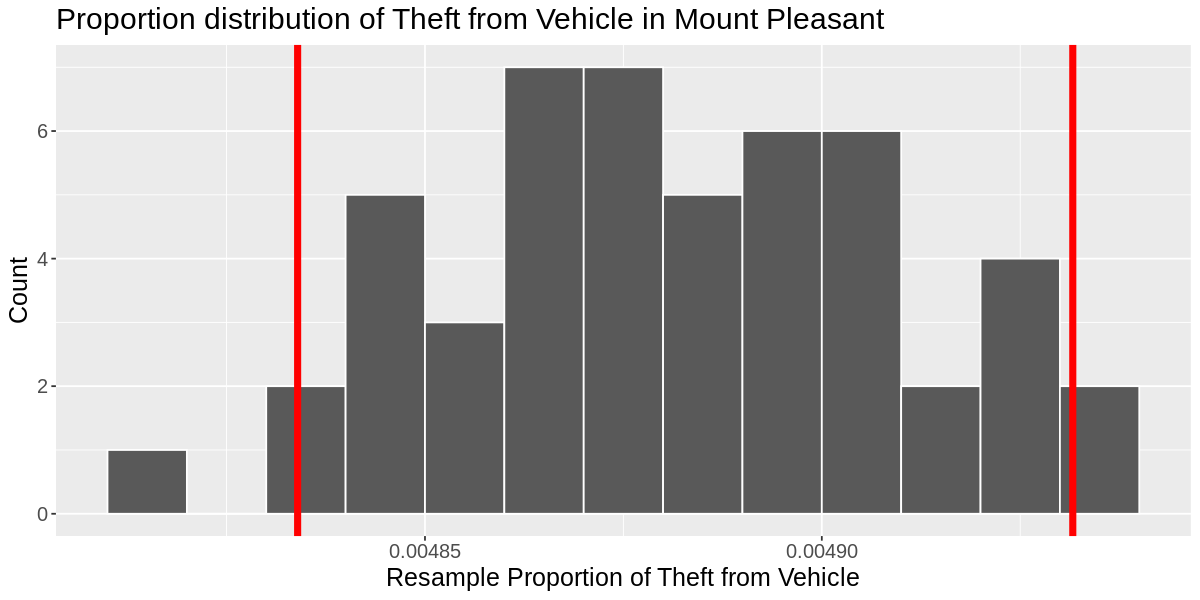

In [117]:
set.seed(1)

# Plotting the proportion differences for the theft from vehicle in the two neighbourhoods
options(repr.plot.width = 10, repr.plot.height = 5)
mount_pleasant_sample_prop_plot <- mount_pleasant_sample_prop %>%
      ggplot(aes(x = prop)) +
      geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
      ggtitle("Proportion distribution of Theft from Vehicle in Mount Pleasant") +
      geom_vline(xintercept = mount_pleasant_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = mount_pleasant_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
      labs(x = "Resample Proportion of Theft from Vehicle", y="Count")

strathcona_sample_prop_plot <- strathcona_sample_prop %>%
    ggplot(aes(x = prop)) +
  geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
    ggtitle("Proportion distribution of Theft from Vehicle in Strathcona") +
      geom_vline(xintercept = strathcona_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = strathcona_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
  labs(x = "Resample Proportion of Theft from Vehicle", y="Count")


mount_pleasant_sample_prop_plot

*Plot 5: Proportion distribution of Theft from Vehicle in Mount Pleasant*

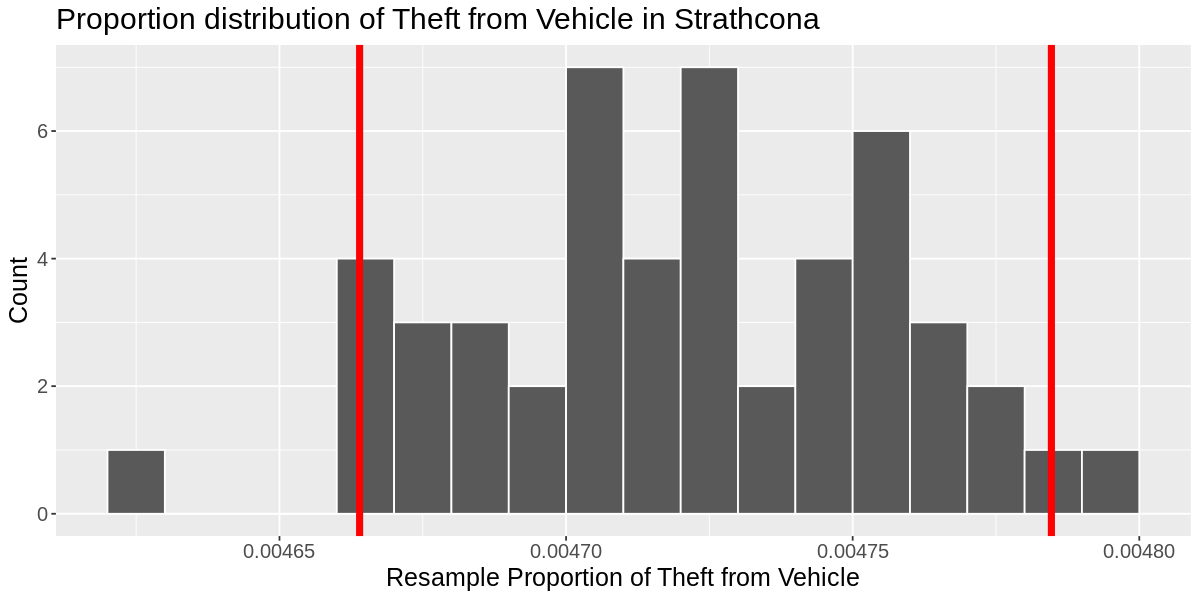

In [118]:
strathcona_sample_prop_plot

*Plot 6: Proportion distribution of Theft from Vehicle in Strathcona*

In [119]:
set.seed(1)

#Finding the standard error for the two neighbourhoods
mount_pleasant_sd <- mount_pleasant_sample_prop %>%
    summarize(SE = sd(prop))

strathcona_sd <- strathcona_sample_prop %>%
    summarize(SE = sd(prop))


mount_pleasant_sd

SE
<dbl>
2.816129e-05


*Table 19: Standard error in Mount Pleasant*

In [120]:
strathcona_sd

SE
<dbl>
3.675799e-05


*Table 20: Standard error in Strathcona*

In [122]:
# Finding the confidence intervals for the two neighbourhoods for offence against a person
set.seed(1)
mount_pleasant_sample_offence_prop <- mount_pleasant_sample %>%
    summarise(prop = sum(TYPE == "Offence Against a Person")/nrow(mount_pleasant_sample))

strathcona_sample_offence_prop <- strathcona_sample %>%
    summarise(prop = sum(TYPE == "Offence Against a Person")/nrow(strathcona_sample))


mount_pleasant_offence_ci <- mount_pleasant_sample_prop %>%
    get_ci(level = 0.95, type = "percentile") # Setting the level of Confidence Interval at 95%

strathcona_offence_ci <- strathcona_sample_prop %>%
    get_ci(level = 0.95, type = "percentile") # Setting the level of Confidence Interval at 95%



mount_pleasant_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004833955,0.004931622


*Table 21: Confidence interval for Mount Pleasant*

In [123]:
strathcona_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.004663982,0.004784667


*Table 22: Confidence interval for Strathcona*

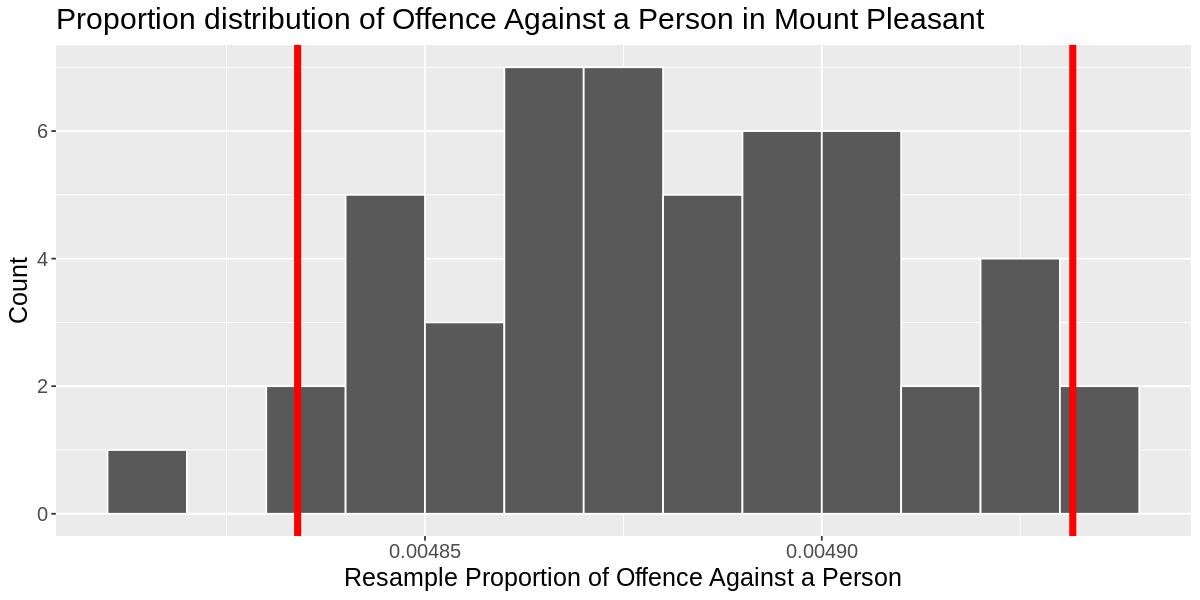

In [125]:
set.seed(1)

# Plotting the proportion differences for the offence against a person in the two neighbourhoods
options(repr.plot.width = 10, repr.plot.height = 5)
mount_pleasant_sample_prop_plot_offence <- mount_pleasant_sample_prop %>%
      ggplot(aes(x = prop)) +
      geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
      ggtitle("Proportion distribution of Offence Against a Person in Mount Pleasant") +
      geom_vline(xintercept = mount_pleasant_offence_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = mount_pleasant_offence_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
      labs(x = "Resample Proportion of Offence Against a Person", y="Count")

strathcona_sample_prop_plot_offence <- strathcona_sample_prop %>%
    ggplot(aes(x = prop)) +
  geom_histogram(binwidth = 1/100000, color = "white", boundary = 1990) +
    ggtitle("Proportion distribution of Offence Against a Person in Strathcona") +
      geom_vline(xintercept = strathcona_offence_ci$lower_ci, color = "red", lwd=2) +
      geom_vline(xintercept = strathcona_offence_ci$upper_ci, color = "red", lwd=2) +
    theme(text=element_text(size=15)) +
  labs(x = "Resample Proportion of Offence Against a Person", y="Count")


mount_pleasant_sample_prop_plot_offence

*Plot 7: Proportion distribution of Offence Against a person in Mount Pleasant*

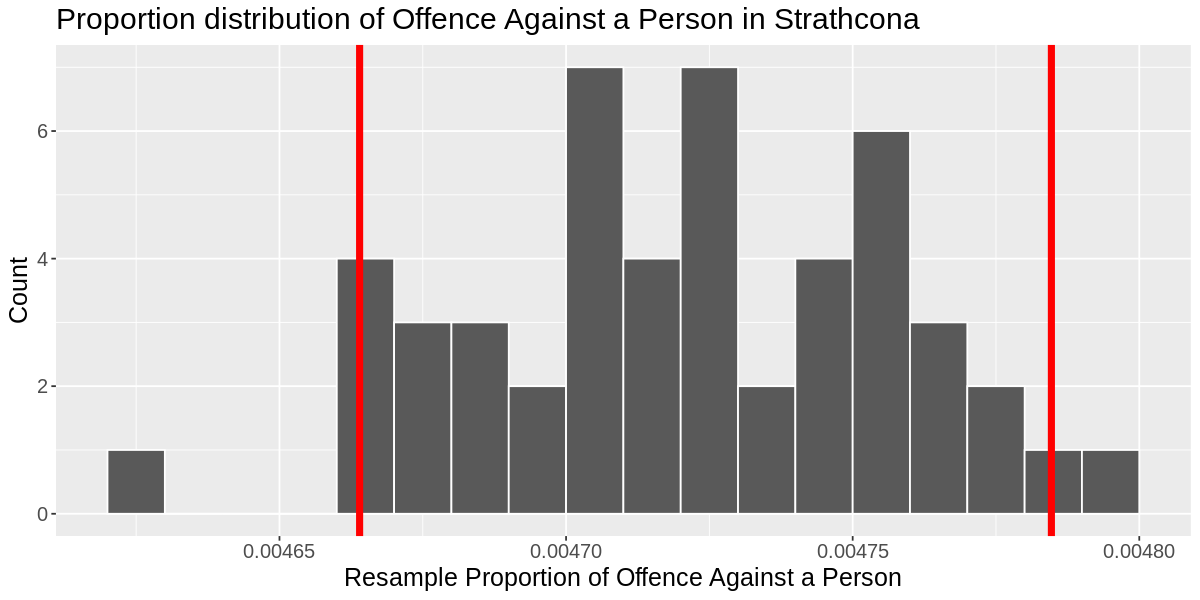

In [126]:
strathcona_sample_prop_plot_offence

*Plot 8: Proportion distribution of Offence Against a person in Strathcona*

### T-test

In [129]:
set.seed(1)


# Running the t-test model on the both the crime types and neighbourhoods to find the p-values
z_test_result_theft <- tidy(
  prop.test(x = c(dataMP$n[1], dataS$n[1]),
            n = c(proportion$total_number_of_crime[2], proportion$total_number_of_crime[1]),
            correct = FALSE,
            alternative = "greater")
)

z_test_result_offence <- tidy(
  prop.test(x = c(dataMP$n[10], dataS$n[10]),
            n = c(proportion$total_number_of_crime[2], proportion$total_number_of_crime[1]),
            correct = FALSE,
            alternative = "greater")
)

z_test_result_theft

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.2440519,0.2360972,9.575154,0.0009861416,1,0.003726004,1,2-sample test for equality of proportions without continuity correction,greater


*Table 23: T-test summary for theft from a vehicle*

In [130]:
z_test_result_offence

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.07015234,0.1752476,2822.307,1,1,-0.1082956,1,2-sample test for equality of proportions without continuity correction,greater


*Table 24: T-test summary for Offence against a person*

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", "Other Theft") from the supplied response variable 'TYPE'.

Dropping unused factor levels c("Sunset", "Kensington-Cedar Cottage", "Central Business District", "Fairview", "Grandview-Woodland", "West End", "Hastings-Sunrise", "Shaughnessy", "Kitsilano", "Marpole", "Stanley Park", "Oakridge", "Riley Park", "West Point Grey", "Victoria-Fraserview", "Kerrisdale", "Arbutus Ridge", "Renfrew-Collingwood", "Musqueam", "Killarney", "Dunbar-Southlands", "South Cambie") from the supplied explanatory variable 'NEIGHBOURHOOD'.



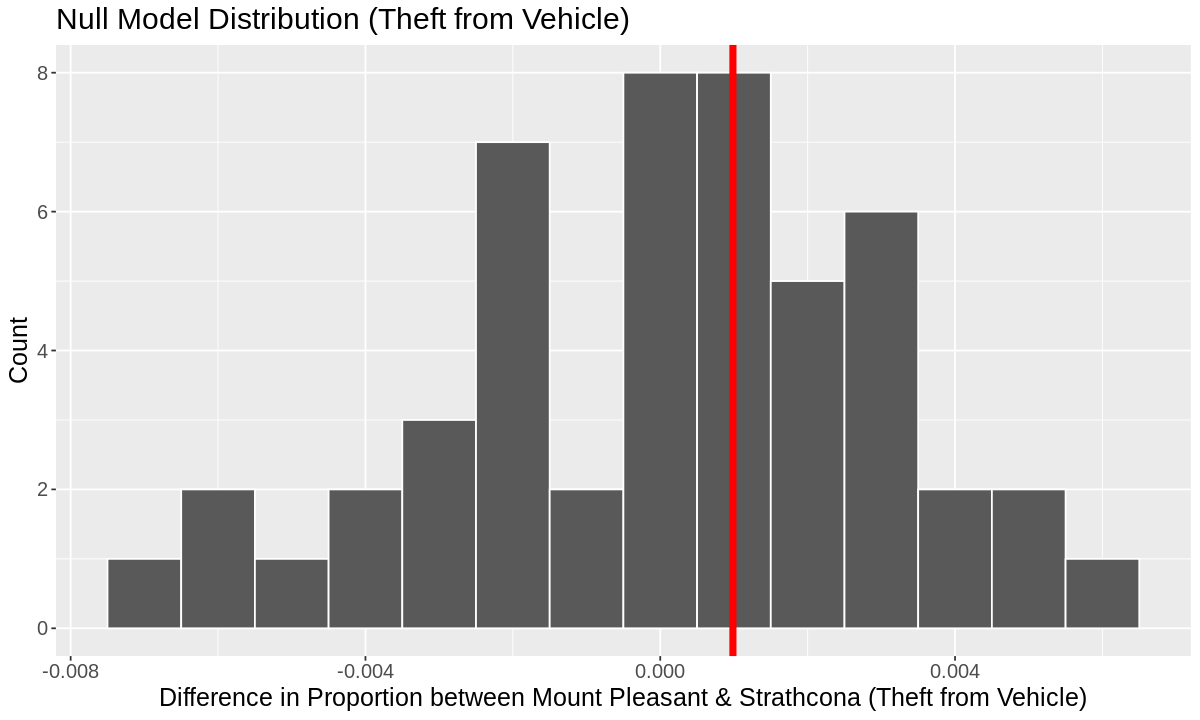

In [132]:
set.seed(1)

# Bootstrap analysis
# Running the null distribution model and plotting the values for Theft from Vehicle
options(repr.plot.width = 10, repr.plot.height = 6)
null_model_theft <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Theft from Vehicle") %>%
    generate(reps = 50, type = 'bootstrap') %>%
    hypothesise(null = 'independence') %>%
    group_by(replicate) %>%
    summarise(stat = (sum(TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Theft from Vehicle" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[1])))  %>%

    mutate(stat = stat + (0 - mean(stat)))

null_dist_plot_theft <- null_model_theft %>%
    ggplot() +
    geom_histogram(aes(x = stat), binwidth =1/1000, color = "White") +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Theft from Vehicle)', y='Count')+
    ggtitle('Null Model Distribution (Theft from Vehicle)') +
    geom_vline(xintercept = z_test_result_theft$p.value, color = "red", lwd=2) +
    theme(text=element_text(size=15))

    

null_dist_plot_theft

*Plot 9 : Bootstrap Null Model Distribution (Theft from Vehicle)*

Dropping unused factor levels c("Theft of Bicycle", "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", "Vehicle Collision or Pedestrian Struck (with Injury)", "Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", "Other Theft") from the supplied response variable 'TYPE'.

Dropping unused factor levels c("Sunset", "Kensington-Cedar Cottage", "Central Business District", "Fairview", "Grandview-Woodland", "West End", "Hastings-Sunrise", "Shaughnessy", "Kitsilano", "Marpole", "Stanley Park", "Oakridge", "Riley Park", "West Point Grey", "Victoria-Fraserview", "Kerrisdale", "Arbutus Ridge", "Renfrew-Collingwood", "Musqueam", "Killarney", "Dunbar-Southlands", "South Cambie") from the supplied explanatory variable 'NEIGHBOURHOOD'.



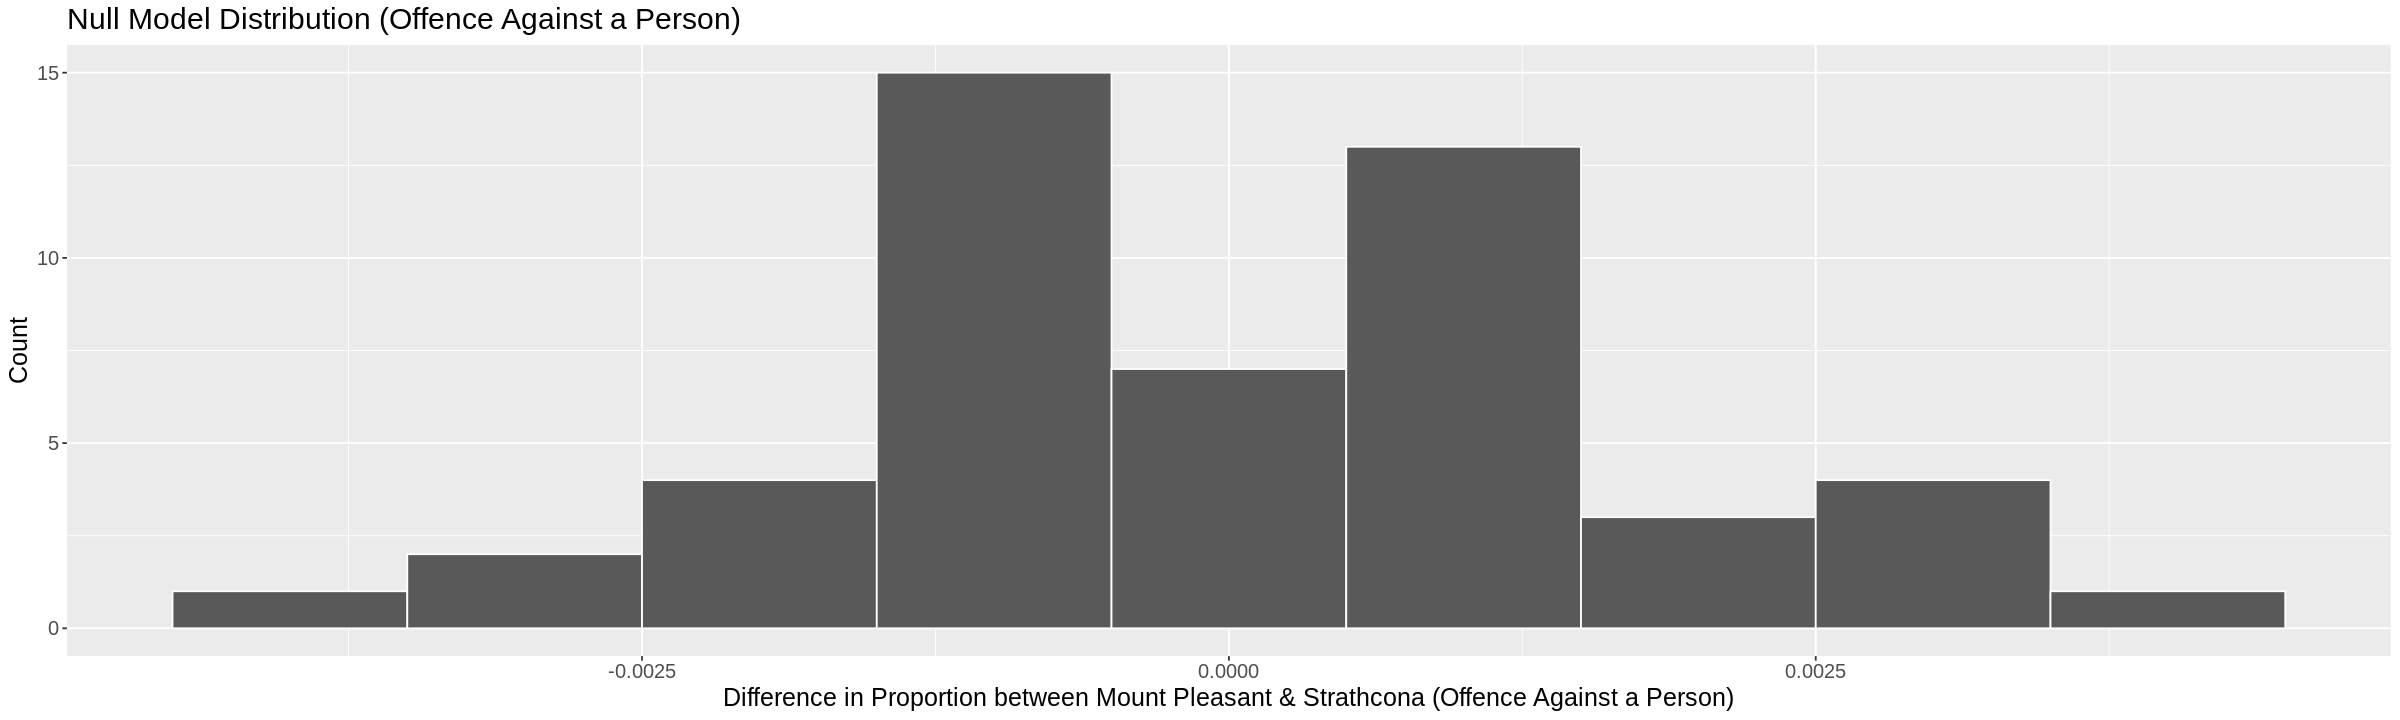

In [34]:
set.seed(1)
options(repr.plot.width = 20, repr.plot.height = 6)

# Asymptotic analysis: Permutation
# Running the null distribution model and plotting the values for Offence Against a Person
null_model_offence <- crime_mp_s %>% 
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    hypothesise(null = 'independence') %>%
    generate(reps = 50, type = 'permute') %>%
    
    group_by(replicate) %>%
    summarise(stat = (sum(TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Mount Pleasant") / proportion$total_number_of_crime[2])
                 - (sum((TYPE == "Offence Against a Person" & NEIGHBOURHOOD == "Strathcona") / proportion$total_number_of_crime[1])))  %>%
    mutate(stat = stat + (0 - mean(stat)))

null_dist_plot_offence <- null_model_offence %>%
    ggplot() +
    geom_histogram(aes(x = stat), binwidth =1/1000, color = "White") +
    labs(x='Difference in Proportion between Mount Pleasant & Strathcona (Offence Against a Person)', y='Count') +
    ggtitle('Null Model Distribution (Offence Against a Person)') +
    theme(text=element_text(size=15))

    

null_dist_plot_offence

*Plot 10: Permuted Null Model Distribution (Offence Against a Person)*

### Important Note

- The p-value is equals to 1, if we include the red line of p-value here then the null model distribution cannot show in this plot unless we set the xlimit to be a larger number. This implies that the p-value is out of the bounds of the graph

- We are only taking 50 bootstrap samples as we are limited by the computional power of our resources

Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

# Discussion

Summarize what you found, and the implications/impact of your findings.

Based on the p-value we have obtained, we can conclude that the difference in the proportion of theft in vehicle crime between Mount Pleasant and Strathcona is greater in Mount Pleasant. This conclusion is supported by the significantly small p-value we obtained, leading us to reject the null hypothesis. This suggests that the high crime rate in Mount Pleasant can be attributed to the substantial contribution of theft from vehicles. In contrast, for Strathcona, theft from vehicles does not appear to be the primary contributor to its high crime rate.

Turning to the second hypothesis test, we can conclude that there is no significant difference in the proportion of crime against persons between Mount Pleasant and Strathcona. This conclusion is based on the large p-value we obtained, leading us to accept the null hypothesis. This indicates that crime against persons is not the main factor contributing to the high crime rates observed in both Mount Pleasant and Strathcona.

The results imply that law enforcement could consider focusing on addressing theft from vehicle crimes more attentively. One potential approach could involve increasing fines and penalties to deter such crimes and subsequently reduce overall crime rates associated with theft from vehicles.

If relevant, discuss whether your results were what you expected to find.

Discuss future questions/research this study could lead to.

# Reference